# Load Default prediction

Importing Librabries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import random as rd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier

Loading Datasets

In [ ]:
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")

test_x = pd.read_csv("test_x.csv")
test_y = pd.read_csv("pred_y.csv")

In [ ]:
df=pd.DataFrame(train_x)
df.head()

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083


In [ ]:
df=pd.DataFrame(train_y)
df.head()

,ID,Label
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [ ]:
train_x.shape

(80000, 11)

In [ ]:
train_y.shape


(80000, 2)

In [ ]:

test_x.shape


(20000, 11)

In [ ]:

test_y.shape

(20000, 2)

Check for Duplicates

In [ ]:
train_x.duplicated().sum()

0

Number of Duplicates compared to original

In [ ]:
train_x.duplicated().value_counts()

False    80000
dtype: int64

Checking for Null values

In [ ]:
df=pd.DataFrame(train_x)
df.isnull()


,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,True,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

ID                    0
Expense            2044
Income             1955
Loan type          2011
Occupation type    1859
Age                2014
Score1             1940
Score2             2036
Score3             1955
Score4             1972
Score5             1998
dtype: int64

In [ ]:
df.isnull().sum().sum()

19784

#Filling Null Values

In [ ]:
df2 = df.fillna(value = 0)
df2

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,0.000000,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,0.000000,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,A,0,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,B,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
#Filling Null values with prev values
df4= df.fillna(method = 'pad')
df4

# # #Filling Null values with next values
# # df5= df.fillna(method = 'bfill')
# # df5

# #filling null values column wise, ie copying from prev/next cloumn
# df6 = df.fillna(method = 'pad', axis = 1)
# df6

# df6 = df.fillna({'Income': '0'
#                 ,'Age': '18'})
# df6

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,A,NaN,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.3689,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,B,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [ ]:
df4.isnull().sum().sum()

0

In [ ]:
#Filling with mean

df6 = df.fillna(value = df['Age'].mean())
df6

# #interpolate
# df['Age'] = df['Age'].interpolate(method='linear')

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,0.441105,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,0.441105,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,A,0.441105,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,B,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [ ]:
df2 = df.dropna(how='any')  # other option is all
df2

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
5,6,1523.124500,16622.93724,B,Y,1.0,0.369899,204.834959,-3.645561,602.787598,3315.891612
6,7,1560.817726,15917.47219,A,Z,0.0,0.104027,169.320992,-3.235722,594.224070,3334.102946
...,...,...,...,...,...,...,...,...,...,...,...
79993,79994,1805.323737,16256.61130,A,X,1.0,0.281308,211.050000,18.007713,606.038759,3452.235064
79994,79995,1693.157180,16780.78702,A,Y,0.0,0.215657,194.759062,6.210195,600.748132,3398.042233
79996,79997,1923.617480,14910.36890,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018


In [ ]:
df2.shape

(62281, 11)

The statement "fillna(mode()[0 inplace = True)" is used to fill missing values in a DataFrame with the mode value. The mode value is the most frequently occurring value in a column. The function mode() returns a Series containing the mode value(s) of the column.
However, mode() returns a Series because there can be multiple modes if multiple values occur with the same frequency.
By using [0] after mode(), we are extracting the first mode value from the Series.
The "inplace=True" parameter means that the fillna operation will be performed directly on the DataFrame itself, without creating a new DataFrame. This allows the missing values in the original DataFrame to be replaced with the mode value. In summary, the code snippet "fillna(mode()[0], inplace=True)" fills missing values a DataFrame with the mode value and modifies the DataFrame in-place.


In [ ]:
df = pd.DataFrame(train_x)

df.Expense.fillna(df.Expense.mode()[0], inplace = True)
df.Income.fillna(df.Income.mode()[0], inplace = True)
df['Loan type'].fillna(df['Loan type'].mode()[0], inplace = True)
df['Occupation type'].fillna(df['Occupation type'].mode()[0], inplace = True)
df.Age.fillna(df.Age.mode()[0], inplace = True)
df.Score1.fillna(df.Score1.mode()[0], inplace = True)
df.Score2.fillna(df.Score2.mode()[0], inplace = True)
df.Score3.fillna(df.Score3.mode()[0], inplace = True)
df.Score4.fillna(df.Score4.mode()[0], inplace = True)
df.Score5.fillna(df.Score5.mode()[0], inplace = True)
train_y.Label.fillna(train_y.Label.mode()[0], inplace = True)

df['Loan type'].replace(['A', 'B'], [0, 1], inplace = True)
df['Occupation type'].replace(['X', 'Y', 'Z'], [0, 1, 2], inplace = True)

test_x['Loan type'].replace(['A', 'B'], [0, 1], inplace = True)
test_x['Occupation type'].replace(['X', 'Y', 'Z'], [0, 1, 2], inplace = True)

In [ ]:
df.Expense.isnull().sum()
train_y.isnull().sum().sum()

0

 "stratify" parameter in the train_test_split function is an optional argument that is used to ensure that the target variable's class distribution is maintained in the train and test datasets.

 A random seed is a starting point or an initial value that is used as a reference for generating random numbers or randomization processes. In the context of the train_test_split function, the random seed is an optional parameter that is used to specify a particular starting point for the randomization process during the dataset split.

In [ ]:
df3=pd.DataFrame(test_x)
df3.head()

,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1780.356350,16691.51975,1,0,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,1939.547945,14782.20015,0,2,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,1721.876977,14035.40923,1,2,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,1681.268538,15179.79116,0,2,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,1654.495928,15187.09603,0,1,0,0.272479,178.429450,4.571414,600.006307,3379.363201


In [ ]:
X = train_x.drop("ID", axis = 1)
Y = train_y.drop("ID", axis = 1)
Y = np.ravel(Y) #allows you to flatten multi-dimensional arrays into a 1-dimensional array
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 37, stratify = Y)

Feature Scaling

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test )
X_test   = scaler.transform(X_test  )

scaler.fit(test_x)
test_x = scaler.transform(test_x)

<ipython-input-143-c5bc99938b41>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


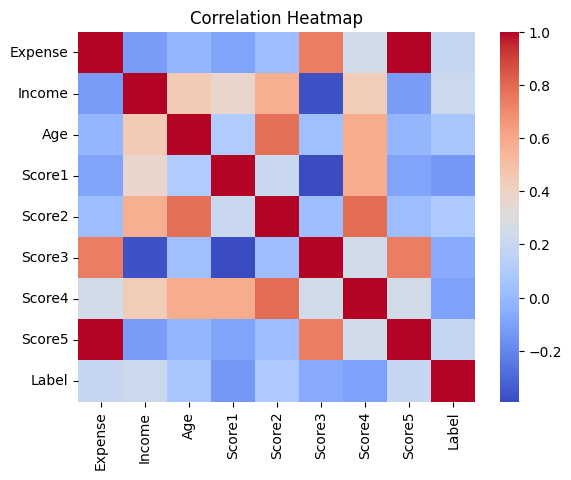

In [ ]:
data_set = pd.read_csv("Combined.csv")
data_df = pd.DataFrame(data_set)
data_df = data_df.dropna()
data_df = data_df.drop("ID", axis = 1)

correlation_matrix = data_df.corr()
sb.heatmap(correlation_matrix, annot = False, cmap = "coolwarm")

plt.title("Correlation Heatmap")
plt.show()

**n_splits**: Specifies the number of folds (or subsets) into which the data will be divided. In this case, the data will be divided into 10 folds.

**n_repeats**: Specifies the number of times the cross-validation process will be repeated with different random shuffling of the data. In this case, the process will be repeated 5 times.

**random_state**: Sets the random seed for reproducibility. By setting a specific value, such as rd.seed(), you ensure that the random shuffling of the data is consistent across different runs.


**model_dt**: Represents the decision tree model that will be evaluated using cross-validation.
**X_train**: Refers to the input features of the training dataset.

**Y_train**: Represents the target variable of the training dataset.

**scoring**='accuracy': Specifies the scoring metric to be used for evaluating the model's performance during cross-validation. In this case, the accuracy metric is used.

**cv**: Represents the cross-validation iterator or number of folds to use. It seems that you have already defined cv using the RepeatedKFold function with specific parameters.

**n_jobs**=-1: Specifies the number of CPU cores to use for computation. By setting it to -1, it utilizes all available CPU cores for parallel execution.




The line **labels** = model_dt.predict(X_test) predicts the labels or classes for the test data X_test using the trained decision tree classifier dtree.

**Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. A high precision indicates a low false positive rate.

**Precision** = TP / (TP + FP)

**Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures the proportion of correctly predicted positive instances out of all actual positive instances. A high recall indicates a low false negative rate.

**Recall** = TP / (TP + FN)

**F1** **Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. It is particularly useful when the class distribution is imbalanced. The F1 score ranges from 0 to 1, where 1 represents the best possible score.

**F1 Score** = 2 * (Precision * Recall) / (Precision + Recall)

The F1 score gives equal weight to precision and recall, providing a balanced evaluation of the model's performance.

###Logistic Regression

**solver**='liblinear': The solver parameter specifies the algorithm to be used for optimization. In this case, 'liblinear' is chosen, which is suitable for small datasets and supports both L1 and L2 regularization.

**penalty**='l1': The penalty parameter specifies the type of regularization to apply. 'l1' indicates L1 regularization, also known as Lasso regularization. L1 regularization encourages sparsity in the model by shrinking some coefficients to exactly zero.

**C**=1.5: The C parameter is the inverse of the regularization strength. It controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C implies stronger regularization. In this case, C is set to 1.5, indicating a moderate level of regularization.



In [ ]:
lgr = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1.5)
lgr.fit(X_train, Y_train)
labels = lgr.predict(X_test)


cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = rd.seed())
scores_lgr = cross_val_score(lgr, X_train, Y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
print("Model: Logistic Regression")

for fold, score in enumerate(scores_lgr):
    print(f"Fold {fold+1}: {score}")
print("Accuracy: ", (np.mean(scores_lgr)))

print(f"Precision: {round(precision_score(Y_test, labels), 4)}")
print(f"Recall: {round(recall_score(Y_test, labels), 4)}")
print(f"F1_score: {round(f1_score(Y_test, labels), 4)}")

Model: Logistic Regression
Fold 1: 0.9591071428571428
Fold 2: 0.9583928571428572
Fold 3: 0.9558928571428571
Fold 4: 0.9514285714285714
Fold 5: 0.9608928571428571
Fold 6: 0.9526785714285714
Fold 7: 0.9555357142857143
Fold 8: 0.9603571428571429
Fold 9: 0.9558928571428571
Fold 10: 0.9548214285714286
Fold 11: 0.9575
Fold 12: 0.9596428571428571
Fold 13: 0.9510714285714286
Fold 14: 0.9608928571428571
Fold 15: 0.9519642857142857
Fold 16: 0.9575
Fold 17: 0.9585714285714285
Fold 18: 0.9578571428571429
Fold 19: 0.9555357142857143
Fold 20: 0.9542857142857143
Fold 21: 0.9539285714285715
Fold 22: 0.9585714285714285
Fold 23: 0.9592857142857143
Fold 24: 0.9555357142857143
Fold 25: 0.9553571428571429
Fold 26: 0.9560714285714286
Fold 27: 0.9564285714285714
Fold 28: 0.9571428571428572
Fold 29: 0.9566071428571429
Fold 30: 0.9553571428571429
Fold 31: 0.9566071428571429
Fold 32: 0.9580357142857143
Fold 33: 0.9548214285714286
Fold 34: 0.9571428571428572
Fold 35: 0.9607142857142857
Fold 36: 0.957678571428571

In [ ]:
print("Accuracy: ", (np.mean(scores_lgr)))

print(f"Precision: {round(precision_score(Y_test, labels), 4)}")
print(f"Recall: {round(recall_score(Y_test, labels), 4)}")
print(f"F1_score: {round(f1_score(Y_test, labels), 4)}")

Accuracy:  0.9564874999999998
Precision: 0.8218
Recall: 0.3848
F1_score: 0.5241


###Decision Tress

In [ ]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, Y_train)

labels = model_dt.predict(X_test)

cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = rd.seed())
scores_dt = cross_val_score(model_dt, X_train, Y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
print("Model: Decision Tree")

for fold, score in enumerate(scores_dt):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy:", (np.mean(scores_dt)))

Model: Decision Tree
Fold 1: 0.9696428571428571
Fold 2: 0.9666071428571429
Fold 3: 0.9621428571428572
Fold 4: 0.9682142857142857
Fold 5: 0.9739285714285715
Fold 6: 0.9635714285714285
Fold 7: 0.9666071428571429
Fold 8: 0.9691071428571428
Fold 9: 0.9666071428571429
Fold 10: 0.965
Fold 11: 0.9691071428571428
Fold 12: 0.9653571428571428
Fold 13: 0.9685714285714285
Fold 14: 0.9648214285714286
Fold 15: 0.9716071428571429
Fold 16: 0.9669642857142857
Fold 17: 0.9683928571428572
Fold 18: 0.9685714285714285
Fold 19: 0.9646428571428571
Fold 20: 0.9698214285714286
Fold 21: 0.9666071428571429
Fold 22: 0.9635714285714285
Fold 23: 0.9644642857142857
Fold 24: 0.9683928571428572
Fold 25: 0.9673214285714286
Fold 26: 0.9646428571428571
Fold 27: 0.9671428571428572
Fold 28: 0.9678571428571429
Fold 29: 0.9667857142857142
Fold 30: 0.9660714285714286
Fold 31: 0.9683928571428572
Fold 32: 0.9657142857142857
Fold 33: 0.9676785714285714
Fold 34: 0.9696428571428571
Fold 35: 0.9660714285714286
Fold 36: 0.9705357142

In [ ]:
print("Mean Accuracy:", (np.mean(scores_dt)))
print(f"Precision: {round(precision_score(Y_test, labels),4)}")
print(f"recall: {round(recall_score(Y_test, labels),4)}")
print(f"f1_score: {round(f1_score(Y_test, labels),4)}")

Mean Accuracy: 0.9672642857142858
Precision: 0.7474
recall: 0.7272
f1_score: 0.7372


###Random Forest



In [ ]:
model_rf = RandomForestClassifier(n_estimators = 200, max_depth = 10)
model_rf.fit(X_train, Y_train)
labels = model_rf.predict(X_test)

cv = RepeatedKFold(n_splits = 10, n_repeats = 2, random_state = rd.seed())
scores_rf = cross_val_score(model_rf, X_train, Y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
print("Model: Random Forest")

for fold, score in enumerate(scores_rf):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy:", (np.mean(scores_rf)))

Model: Random Forest
Fold 1: 0.9794642857142857
Fold 2: 0.9775
Fold 3: 0.9780357142857142
Fold 4: 0.9778571428571429
Fold 5: 0.9758928571428571
Fold 6: 0.9782142857142857
Fold 7: 0.9764285714285714
Fold 8: 0.9744642857142857
Fold 9: 0.9732142857142857
Fold 10: 0.9733928571428572
Fold 11: 0.9801785714285715
Fold 12: 0.9758928571428571
Fold 13: 0.9751785714285715
Fold 14: 0.9776785714285714
Fold 15: 0.97625
Fold 16: 0.9766071428571429
Fold 17: 0.9766071428571429
Fold 18: 0.9742857142857143
Fold 19: 0.9746428571428571
Fold 20: 0.9760714285714286
Mean Accuracy: 0.9763928571428572


In [ ]:
print("Mean Accuracy:", (np.mean(scores_rf)))
print(f"Precision: {round(precision_score(Y_test, labels),4)}")
print(f"recall: {round(recall_score(Y_test, labels),4)}")
print(f"f1_score: {round(f1_score(Y_test, labels),4)}")

Mean Accuracy: 0.9763928571428572
Precision: 0.9008
recall: 0.6735
f1_score: 0.7707


###K Nearest Neighbors:

**n_estimators**=200: The n_estimators parameter specifies the number of decision trees to be used in the random forest. In this case, the value is set to 200, which means that the random forest will consist of 200 decision trees.

**max_depth**=10: The max_depth parameter determines the maximum depth of each decision tree in the random forest. It limits the number of levels or splits in each tree. By setting it to 10, the decision trees in the random forest will have a maximum depth of 10.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 14)
model_knn.fit(X_train, Y_train)
labels = model_knn.predict(X_test)

cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = rd.seed())
scores_knn = cross_val_score(model_knn, X_train, Y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
print("Model: K Nearest Neighborst")

for fold, score in enumerate(scores_knn):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy:", (np.mean(scores_knn)))

Model: K Nearest Neighborst
Fold 1: 0.9753571428571428
Fold 2: 0.9755357142857143
Fold 3: 0.9767857142857143
Fold 4: 0.9771428571428571
Fold 5: 0.9766071428571429
Fold 6: 0.9785714285714285
Fold 7: 0.9773214285714286
Fold 8: 0.9760714285714286
Fold 9: 0.9760714285714286
Fold 10: 0.9789285714285715
Fold 11: 0.9755357142857143
Fold 12: 0.98
Fold 13: 0.9780357142857142
Fold 14: 0.9780357142857142
Fold 15: 0.9771428571428571
Fold 16: 0.9760714285714286
Fold 17: 0.9773214285714286
Fold 18: 0.9753571428571428
Fold 19: 0.9755357142857143
Fold 20: 0.9764285714285714
Fold 21: 0.9776785714285714
Fold 22: 0.97625
Fold 23: 0.9791071428571428
Fold 24: 0.9753571428571428
Fold 25: 0.9751785714285715
Fold 26: 0.9766071428571429
Fold 27: 0.9798214285714286
Fold 28: 0.9771428571428571
Fold 29: 0.9773214285714286
Fold 30: 0.9758928571428571
Fold 31: 0.9751785714285715
Fold 32: 0.9792857142857143
Fold 33: 0.9755357142857143
Fold 34: 0.9773214285714286
Fold 35: 0.9778571428571429
Fold 36: 0.976964285714285

In [ ]:
print("Mean Accuracy:", (np.mean(scores_knn)))
print(f"Precision: {round(precision_score(Y_test, labels),4)}")
print(f"recall: {round(recall_score(Y_test, labels),4)}")
print(f"f1_score: {round(f1_score(Y_test, labels),4)}")

Mean Accuracy: 0.9769160714285714
Precision: 0.904
recall: 0.6609
f1_score: 0.7636


###XGBoost
**verbosity**=0: The verbosity parameter controls the level of verbosity of the XGBoost model's output. A value of 0 means no output will be printed during training.

**use_label_encoder**=False: The use_label_encoder parameter determines whether to use label encoding for the target variable. Setting it to False means that the target variable is not required to be label encoded.

**objective**='binary:logistic': The objective parameter sets the loss function to be optimized during training. In this case, 'binary:logistic' is specified, indicating a binary classification task with logistic regression as the objective.

**booster**='gbtree': The booster parameter selects the type of booster to use. 'gbtree' refers to gradient boosting with decision trees as the base learners.

In [ ]:
model_XGBoost = XGBClassifier(verbosity = 0, use_label_encoder = False, objective = 'binary:logistic', booster = 'gbtree' )
model_XGBoost.fit(X_train, Y_train)
labels = model_XGBoost.predict(X_test)
labels = [round(value) for value in labels]

cv = RepeatedKFold(n_splits = 10, n_repeats = 2, random_state = rd.seed())
scores_XGBoost = cross_val_score(model_XGBoost, X_train, Y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
print("Model: XGBoost")

for fold, score in enumerate(scores_XGBoost):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy:", (np.mean(scores_XGBoost)))

Model: XGBoost
Fold 1: 0.9825
Fold 2: 0.9792857142857143
Fold 3: 0.9792857142857143
Fold 4: 0.9766071428571429
Fold 5: 0.9810714285714286
Fold 6: 0.9807142857142858
Fold 7: 0.9805357142857143
Fold 8: 0.9792857142857143
Fold 9: 0.9776785714285714
Fold 10: 0.9807142857142858
Fold 11: 0.9805357142857143
Fold 12: 0.9794642857142857
Fold 13: 0.9783928571428572
Fold 14: 0.9801785714285715
Fold 15: 0.9817857142857143
Fold 16: 0.9798214285714286
Fold 17: 0.9783928571428572
Fold 18: 0.9807142857142858
Fold 19: 0.98
Fold 20: 0.9814285714285714
Mean Accuracy: 0.979919642857143


In [ ]:
print("Mean Accuracy:", (np.mean(scores_XGBoost)))
print(f"Precision: {round(precision_score(Y_test, labels),4)}")
print(f"recall: {round(recall_score(Y_test, labels),4)}")
print(f"f1_score: {round(f1_score(Y_test, labels),4)}")

Mean Accuracy: 0.979919642857143
Precision: 0.897
recall: 0.7497
f1_score: 0.8167


###Overall

In [ ]:
print("Accuracy")
print("Logistic Regression:", np.mean(scores_lgr))
print("Decision Trees:", np.mean(scores_dt))
print("K Nearest Neighbors:", np.mean(scores_knn))
print("Random Forest:", np.mean(scores_rf))
print("XGBoost:", np.mean(scores_XGBoost))

Accuracy
Logistic Regression: 0.9564874999999998
Decision Trees: 0.9672642857142858
K Nearest Neighbors: 0.9769160714285714
Random Forest: 0.9763928571428572
XGBoost: 0.979919642857143
